### Q1 CLT applied to sample proportions

The histogram shows the sample proportion (P hat) of a sample of 100 observations. To see how it varies, disable the code with the seed(999) and rerun the cell a few times. To get a feel for the variation, increase the nr of samples from 1 to 10, 40, 1000 and 100000. What does the distribution of the different sample proportions look like? Try changing the sample size as well.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

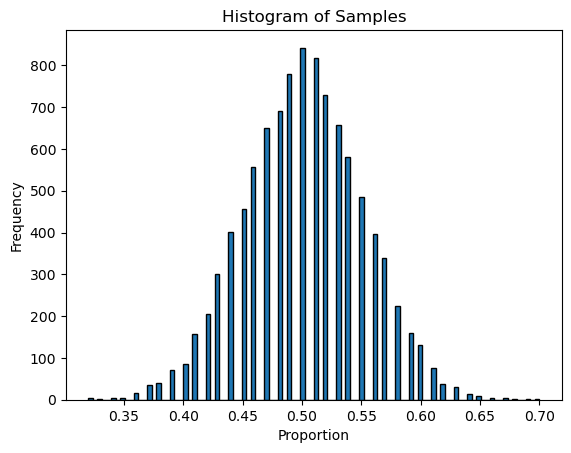

In [ ]:
#np.random.seed(999)

n = 100
P = 0.5
nr_of_samples = 10000


# Try different number of samples to illustrate CLT
sample_proportions = np.random.binomial(n, P, nr_of_samples) / n

plt.hist(sample_proportions, bins=100, edgecolor='black')
plt.title('Histogram of Samples')
plt.xlabel('Proportion')
plt.ylabel('Frequency')
plt.show()

### Population mean speed using t distribution (2 ways)

(this is example code used for Q2 below)

There is concern about the speed of automobiles traveling over a particular stretch of highway. For a random sample of 28 automobiles, radar indicated the following speeds, in miles per hour:

59, 63, 68, 57, 56, 71, 59, \
69, 53, 58, 60, 66, 51, 59, \
54, 64, 58, 57, 66, 61, 65, \
70, 63, 65, 57, 56, 61, 59

Assuming a normal population distribution, find the margin of error of a 95% confidence interval for the mean speed of all automobiles traveling over this stretch of highway.

In [30]:
sample = [59, 63, 68, 57, 56, 71, 59, 
          69, 53, 58, 60, 66, 51, 59, 
          54, 64, 58, 57, 66, 61, 65, 
          70, 63, 65, 57, 56, 61, 59]

n = len(sample)
m = np.mean(sample)
s = np.std(sample, ddof=1)
t = stats.t.ppf(0.975, n-1)
standard_error = s / np.sqrt(n)

ME = t * standard_error

LCL = m - ME
UCL = m + ME

print(f"Mean: {m:.2f}")
print(f"Margin of Error: {ME:.2f}")
print(f"95% Confidence Interval: ({LCL:.2f}, {UCL:.2f})")

Mean: 60.89
Margin of Error: 2.03
95% Confidence Interval: (58.86, 62.92)


In [ ]:
# note to self: this is the best method for me since we are leveraging the built-in functions hence reducing the chances of human errors

sample = [59, 63, 68, 57, 56, 71, 59, 
          69, 53, 58, 60, 66, 51, 59, 
          54, 64, 58, 57, 66, 61, 65, 
          70, 63, 65, 57, 56, 61, 59]

n = len(sample)
m = np.mean(sample)
s = np.std(sample, ddof=1)
standard_error = s/np.sqrt(n)


# Using built-in function
CI = stats.t.interval(0.95, n-1, loc=m, scale=standard_error)

print(f"Mean: {m:.2f}")
print(f"Margin of Error: {ME:.2f}")
print(f"95% Confidence Interval: {CI}")

Mean: 60.89
Margin of Error: 2.03
95% Confidence Interval: (58.86466854310182, 62.92104574261247)


### Q2 Population mean speed using CLT - normal distribution (2 ways)

Same context as before but apply a normal distribution to the sample mean. find the margin of error of a 95% confidence interval for the mean speed of all automobiles traveling over this stretch of highway.

Complete the code below in both cells. The context and set up is the same as the two cells above, but now a normal distribution is used instead of the t distribution.

In [31]:
sample = [59, 63, 68, 57, 56, 71, 59, 
          69, 53, 58, 60, 66, 51, 59, 
          54, 64, 58, 57, 66, 61, 65, 
          70, 63, 65, 57, 56, 61, 59]

n = len(sample)
m = np.mean(sample)
s = np.std(sample, ddof=1)
z = stats.t.ppf(0.975, n-1)
standard_error = s/np.sqrt(n)

ME = t * standard_error

LCL = m - ME
UCL = m + ME

print(f"Mean: {m:.2f}")
print(f"Margin of Error: {ME:.2f}")
print(f"95% Confidence Interval: ({LCL:.2f}, {UCL:.2f})")

Mean: 60.89
Margin of Error: 2.03
95% Confidence Interval: (58.86, 62.92)


In [35]:
sample = [59, 63, 68, 57, 56, 71, 59, 
          69, 53, 58, 60, 66, 51, 59, 
          54, 64, 58, 57, 66, 61, 65, 
          70, 63, 65, 57, 56, 61, 59]

n = len(sample)
m = np.mean(sample)
s = np.std(sample, ddof=1)
standard_error = s/np.sqrt(n)

ME = t * standard_error

# Using built-in function
CI = stats.t.interval(0.95, n-1, loc=m, scale=standard_error)

print(f'Mean: {m:.2f}')
print(f'Margin of error:{ME:.2f}')
print(f'95% Confidence Interval: {CI}')

Mean: 60.89
Margin of error:2.03
95% Confidence Interval: (58.86466854310182, 62.92104574261247)


### Q3 Confidence Interval for the Population Proportion

In a random sample of 95 manufacturing firms, 67 indicated that their companies attained ISO certification within the last two years. Find a 99% confidence interval for the population proportion of companies that have been certified within the last 2 years.

Complete the code below and make sure the settings are correct. Compare your answer to the (alternative) code in the second cell.

In [48]:
x = 67
n = 95
p_hat = x / n

alpha = 0.01

standard_error = np.sqrt(p_hat * (1 - p_hat) / n)
confidence_level = 1-alpha/2
z = stats.norm.ppf(confidence_level)

ME = z * standard_error

LCL = p_hat - ME
UCL = p_hat + ME

print(f"99% Confidence Interval: ({LCL:.2f}, {UCL:.2f})")

99% Confidence Interval: (0.58, 0.83)


In [43]:
from statsmodels.stats.proportion import proportion_confint

x = 67
n = 95

# Using built-in function
LCL, UCL = proportion_confint(x, n, alpha=0.01, method='normal')
print(f"Built-in function CI: ({LCL:.4f}, {UCL:.4f})")

Built-in function CI: (0.5848, 0.8258)


### Q4 Confidence Interval for two Population means

Write code that gives two confidence intervals for the population mean. One for each sample. You choose the confidence level (use the same on for both). Can you draw any conclusions based on your results?  

In [52]:
# Ratio of two variances
x = [59, 63, 68, 57, 56, 71, 59, 
     69, 53, 58, 60, 66, 51, 59, 
     54, 64, 58, 57, 66, 61, 65, 
     70, 63, 65, 57, 56, 61, 59,
     59, 63, 68, 57, 56, 71, 59, 
     69, 53, 58, 60, 66, 51, 59, 
     54, 64, 58, 57, 66, 61, 65, 
     70, 63, 65, 57, 56, 61, 59]

y = [55, 53, 58, 57, 56, 51, 49, 
     49, 53, 68, 57, 46, 51, 45, 
     54, 64, 58, 57, 66, 61, 65, 
     70, 63, 65, 57, 56, 61, 59,
     59, 63, 68, 57, 56, 71, 59, 
     69, 53, 58, 60, 66, 51, 59,
     59, 53, 68, 57, 56, 61, 45, 
     55, 63, 58, 67, 46, 51, 49]

n1 = len(x)
n2 = len(y)

m1 = np.mean(x)
m2 = np.mean(y)

s1 = np.std(x, ddof=1)
s2 = np.std(y, ddof=1)

z = stats.norm.ppf(0.975, n-1)

standard_error1 = s1 / np.sqrt(n1)
standard_error2 = s2 / np.sqrt(n2)

ME1 = z * standard_error1
ME2 = z * standard_error2

LCL1 = m1 - ME1
UCL1 = m1 + ME1

LCL2 = m2 - ME2
UCL2 = m2 + ME2

print(f"95% Confidence Interval for x: ({LCL1:.2f}, {UCL1:.2f})")
print(f"95% Confidence Interval for y: ({LCL2:.2f}, {UCL2:.2f})")

95% Confidence Interval for x: (40.84, 80.95)
95% Confidence Interval for y: (32.27, 83.48)
